Steps involved in the Project:

Data Cleaning:
Removing unwanted columns.
Exploring & comparing length of messages.
Performing undersampling on dataset.
Text preparation:
Tokenization of Messages.
One hot implementation on tokenized message(corpus)
Perform word embedding
Data preparation/Data Splitting:
Split the data into training+validation(85%) & testing(15%) data.
Further split the training+validation data into training(85%) and validation(15%) data.
Model Building:
Build a Sequential model: Embedding Layer->LSTM->Dense(output layer)
Fit and Validate model on training and validation model
Model Evaluation:
Evaluate the model on test dataset.
Get the model accuracy score and visualize confusion matrix
Model Testing:
Created a function that would classifiy the messages using the model

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data=pd.read_csv("/content/spam.csv",encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [9]:
# renaming column v1 and v2

data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [11]:
display(data)
#head of data 
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# check if data contains null value in it 
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
#information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
# creatng new column which computes message length 
data["Message Length"]=data["Message"].apply(len)

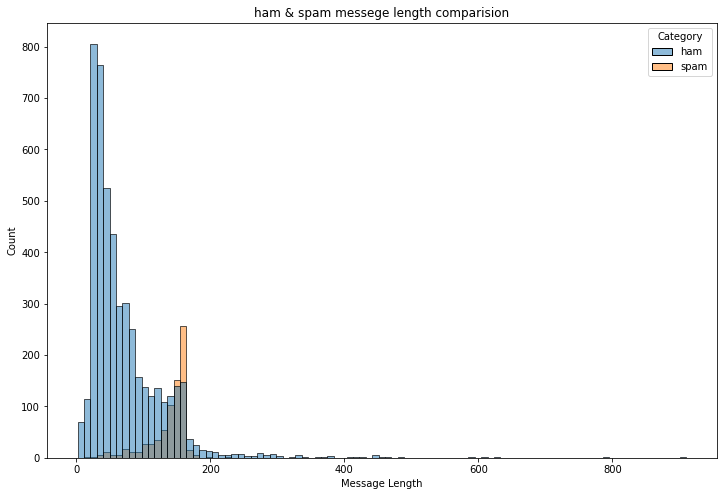

In [15]:
#Visualising dfference among Spam and ham messages 

fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

From the statistics of the two description we can see that the ham contains the longest message of 910 length. However more than 70% of the ham messages contains messages of length less than 90.

In [16]:
# information about the dataset
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [17]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


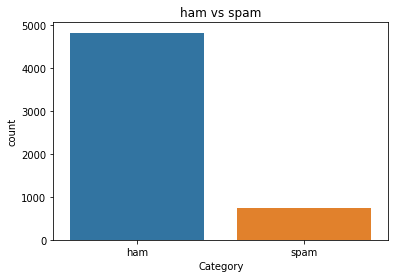

In [18]:
# visualising count among Spam and ham messages 

sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [19]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


As there is unequal count for both, we will perform undersampling in here. 

In [21]:
import numpy as np


#compute the length of majority & minority class
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])

#store the indices of majority and minority class
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index

#generate new majority indices from the total majority_indices
#with size equal to minority class length so we obtain equivalent number of indices length
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

#concatenate the two indices to obtain indices of new dataframe
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])

#create df using new indices
df=data.loc[undersampled_indices]

#shuffle the sample
df=df.sample(frac=1)

#reset the index as its all mixed
df=df.reset_index()

#drop the older index
df=df.drop(
    columns=["index"],
)

In [22]:
# shape and count for both 

df.shape
df["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

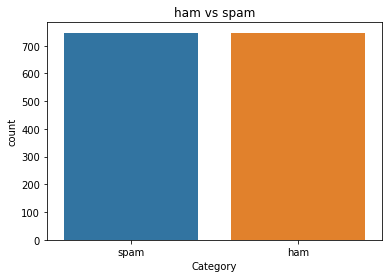

In [23]:
# further visualisation 

sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [25]:
#disaplying head 

df.head()


,Category,Message,Message Length
0,spam,18 days to Euro2004 kickoff! U will be kept in...,135
1,spam,"Thanks for your ringtone order, reference numb...",156
2,spam,Reminder: You have not downloaded the content ...,127
3,ham,So how's the weather over there?,32
4,ham,His frens go then he in lor. Not alone wif my ...,60


In [27]:
# Creating new column Label and encode ham as 0 and spam as 1
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

df.head()

,Category,Message,Message Length,Label
0,spam,18 days to Euro2004 kickoff! U will be kept in...,135,1
1,spam,"Thanks for your ringtone order, reference numb...",156,1
2,spam,Reminder: You have not downloaded the content ...,127,1
3,ham,So how's the weather over there?,32,0
4,ham,His frens go then he in lor. Not alone wif my ...,60,0


In [30]:
# Import libraries to perform word tokenization
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
# Perform word tokenization using the below block of code
#declare empty list to store tokenized message
corpus=[]

#iterate through the df["Message"]
for message in df["Message"]:
    
    #replace every special characters, numbers etc.. with whitespace of message
    #It will help retain only letter/alphabets
    message=re.sub("[^a-zA-Z]"," ",message)
    
    #convert every letters to its lowercase
    message=message.lower()
    
    #split the word into individual word list
    message=message.split()
    
    #perform stemming using PorterStemmer for all non-english-stopwords
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    #join the word lists with the whitespace
    message=" ".join(message)
    
    #append the message in corpus list
    corpus.append(message)

Perform one_hot on the corpus

I have initialized the vocabulary size to 10,000.

oneHot_doc will contain the list of indices of words in the corpus whose indices will range in bw 0-10,000.

In [33]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]



In [34]:
# perform word embedding 
df["Message Length"].describe()

count    1494.000000
mean      105.711513
std        59.596155
min         3.000000
25%        49.250000
50%       118.500000
75%       153.000000
max       790.000000
Name: Message Length, dtype: float64

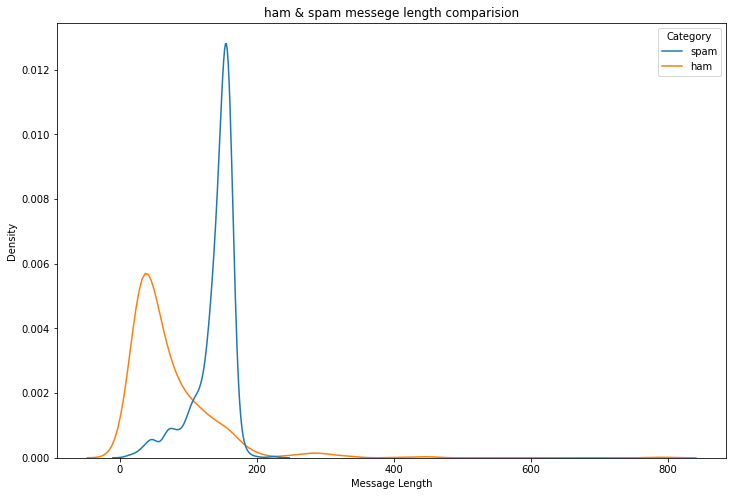

In [35]:
#visualizing the Messages length using kdeplot.
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

We will use pad_sequences from keras to perform word embedding.

This will make every list to an equal length(sentence length) which we can later be fed to our model.

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

Let us make a data frame using embedded document, and a target using Label column from df

In [37]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [38]:
df_final=pd.concat([extract_features,target],axis=1)

In [39]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9614,6830,4063,1481,7135,1824,5500,6859,9225,3627,4885,615,4001,6830,9054,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9808,5873,9530,6096,4760,2349,4069,1004,9875,8751,6641,7375,8437,209,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2861,2978,2535,6264,7996,561,3950,9321,241,9504,8156,2535,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5173,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3137,9750,9044,2875,3503,6952,7700,2343,9044,0


In [40]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)

In [43]:
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [44]:
# import libraries to create model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [45]:
model=Sequential()

In [46]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

In [47]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [48]:
model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 11s 265ms/step - loss: 0.5035 - accuracy: 0.7597 - val_loss: 0.2541 - val_accuracy: 0.9110
Epoch 2/10
34/34 [==============================] - 8s 247ms/step - loss: 0.1844 - accuracy: 0.9369 - val_loss: 0.1169 - val_accuracy: 0.9634
Epoch 3/10
34/34 [==============================] - 8s 250ms/step - loss: 0.0552 - accuracy: 0.9861 - val_loss: 0.1240 - val_accuracy: 0.9634
Epoch 4/10
34/34 [==============================] - 8s 248ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.2106 - val_accuracy: 0.9372
Epoch 5/10
34/34 [==============================] - 8s 250ms/step - loss: 0.0506 - accuracy: 0.9898 - val_loss: 0.1262 - val_accuracy: 0.9476
Epoch 6/10
34/34 [==============================] - 8s 247ms/step - loss: 0.0316 - accuracy: 0.9944 - val_loss: 0.1225 - val_accuracy: 0.9529
Epoch 7/10
34/34 [==============================] - 8s 248ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.1299 - val_accuracy: 0.9529
Epoch

In [49]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

In [50]:
# Evaluate model 
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:96.89%


array([[116,   1],
       [  6, 102]])

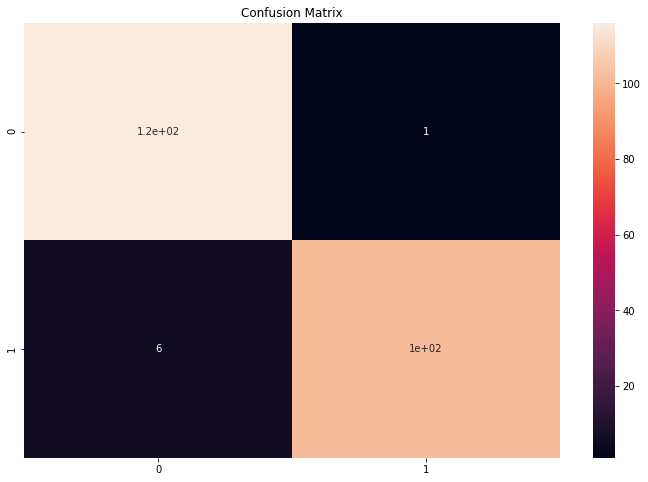

In [52]:
#Lets visualize our confusion_matrix using heatmap

#Our Model also gives a better generalization since the number of False Positive(FP) and False Negative(FN) are relatively lesser than the True Postive(TP) and True Negative(TN)


cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

In [54]:
 #final code(function) that would take a raw message and classfiy the message using the model

 #The function take model and message as parameter
def classify_message(model,message):
    
    #We will treat message as a paragraphs containing multiple sentences(lines)
    #we will extract individual lines
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        
        #Iterate over individual sentences
        for sentence in sentences:
            #replace all special characters
            words=re.sub("[^a-zA-Z]"," ",sentence)
            
            #perform word tokenization of all non-english-stopwords
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)
    
    #perform one_hot on tokenized word            
    oneHot=[one_hot(word,n=vocab_size)]
    
    #create an embedded documnet using pad_sequences 
    #this can be fed to our model
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    
    #predict the text using model
    predict=model.predict(text)
    
    #if predict value is greater than 0.5 its a spam
    if predict>0.5:
        print("It is a spam")
    #else the message is not a spam    
    else:
        print("It is not a spam")



In [68]:
message1="Coding takes lots of time and sometimes, takes all your day"
message2="We detected fraudelent activity on your Apple icloud account,to rest password click on  www.apple1224.com"

In [69]:
classify_message(model,message2)

It is a spam


In [70]:
classify_message(model,message1)

It is not a spam
